# Statistical Thinking in Python Part 1

### Section 1 - Graphical Exploratory Data Analysis

#### Plotting a histogram of iris data

Import the libraries we will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

Loading the `versicolor_petal_length` data.

In [3]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

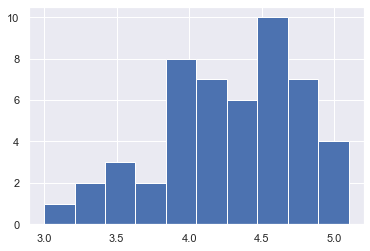

In [4]:
plt.hist(versicolor_petal_length);

The above plot looks uninformative, so lets label the axis.

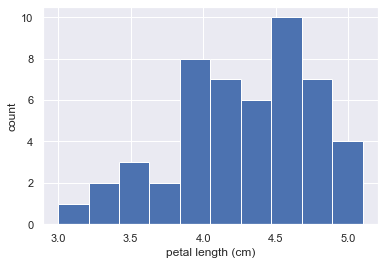

In [5]:
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

We can also give it a title. 

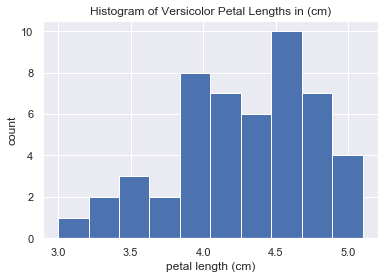

In [6]:
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
_ = plt.title("Histogram of Versicolor Petal Lengths in (cm)")
plt.show()

#### Change the number of bins

We can also adjust the number of bins of the histogram.<br>Below we will use the "the square root rule". This is a rule of thumb to choose the number of bins based on the square root of number of samples.

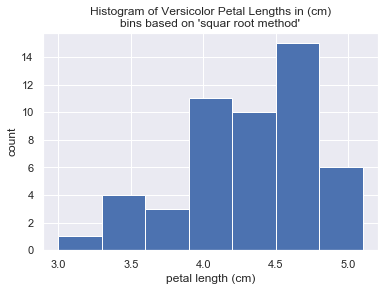

In [7]:
n_data = len(versicolor_petal_length)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

_ = plt.hist(versicolor_petal_length,bins = n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
_ = plt.title("Histogram of Versicolor Petal Lengths in (cm)\nbins based on 'squar root method'")

#### Bee swarm plot

Lets plot the swarm plot on the iris dataset.

First lets load the data.

In [8]:
df = pd.read_csv('data/iris.csv')

In [9]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


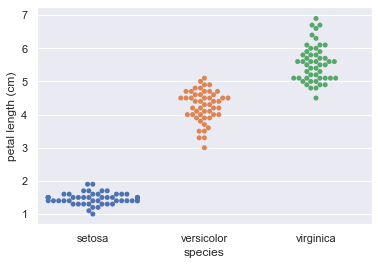

In [10]:
sns.swarmplot(x='Species', y = 'Petal.Length', data = df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)');

#### Empirical Cumulative Distribution Function (ECDF)

Wi will also learn about to plot Empirical Cumulative Distribution Function (ECDF). First lets define a function to return the values x,y to plot ECDF.

In [11]:
def ecdf(data):
    
    '''Compute the ECDF for one dimensional array'''
    
    # Number of data points: n
    
    n = len(data)
    
    # x:data for ECDF: x
    
    x = np.sort(data)
    
    # y:data for ECDF: y
    
    y = np.linspace(0,n,n)/n
    
    return x, y

Now lets use it to plot the versicolor_petal_length.

In [12]:
x_var , y_var = ecdf(versicolor_petal_length)

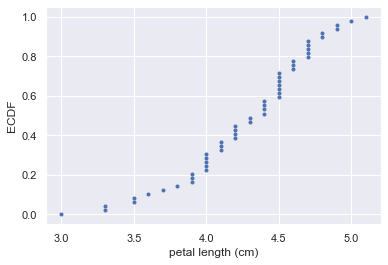

In [13]:
_ = plt.plot(x_var, y_var, marker = '.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF');

We can compare ECDF plot for different variables from the iris data. First we will separate the data from the df.

In [14]:
def get_iris_data(x = 'setosa'):

    return (df['Petal.Length'][df['Species'] == x]).values
    
setosa_petal_length = get_iris_data('setosa')
versicolor_petal_length = get_iris_data('versicolor')
virginica_petal_length = get_iris_data('virginica')

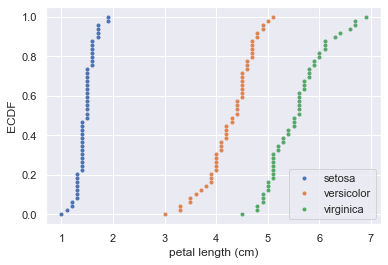

In [15]:
x_set, y_set = ecdf(setosa_petal_length)
x_ver, y_ver = ecdf(versicolor_petal_length)
x_vir, y_vir = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_ver, y_ver, marker = '.', linestyle = 'none')
_ = plt.plot(x_vir, y_vir, marker = '.', linestyle = 'none')

_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


### Section 2 Quantitative Exploratory Data Analysis

#### Computing the mean

In [16]:
mean_length_ver = np.mean(versicolor_petal_length)

print(f"The versicolor mean length in cm is {mean_length_ver}")

The versicolor mean length in cm is 4.26


#### Computing Percentiles

In [17]:
percentiles = np.array([2.5,25,50,75,97.5])
ptiles_vers = np.percentile(versicolor_petal_length, q = percentiles)

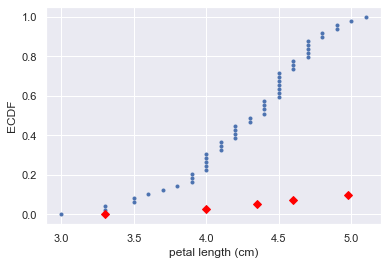

In [18]:
_ = plt.plot(x_ver, y_ver, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/1000, marker='D', color='red',
         linestyle='none')

#### Box and Whisker plot

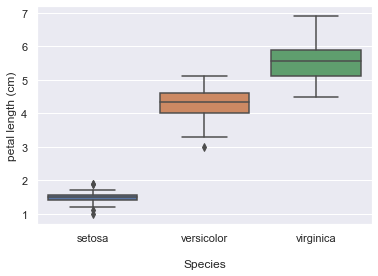

In [19]:
sns.boxplot(x = 'Species', y = 'Petal.Length', data = df)
_ = plt.xlabel('\nSpecies')
_ = plt.ylabel('petal length (cm)');

#### Computing the Variance of the data.

In [20]:
variance = np.var(versicolor_petal_length)
print(f"The variance of versicolor is {variance}")

The variance of versicolor is 0.21640000000000004


#### Computing the standard deviation

In [21]:
std = np.var(versicolor_petal_length)
print(f"The standard deviation of versicolor is {std}")

The standard deviation of versicolor is 0.21640000000000004


#### Scatter Plots

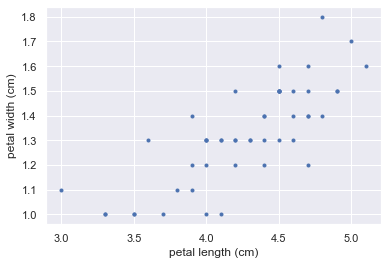

In [22]:
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

_ = plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

#### Compute the covariance matrix

In [23]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

print('-'* 50)

print(f'The covariance of length and width is {covariance_matrix[0,1]}')


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
--------------------------------------------------
The covariance of length and width is 0.07310204081632653


#### Compute Pearson correlation coefficient

In [24]:
cor = np.corrcoef(versicolor_petal_width, versicolor_petal_length)[0,1]

print(f'The correlation of length and width is {cor}')

The correlation of length and width is 0.7866680885228169


### Section 3 - Thinking probabilistically - Discrete variables

#### Generating random numbers

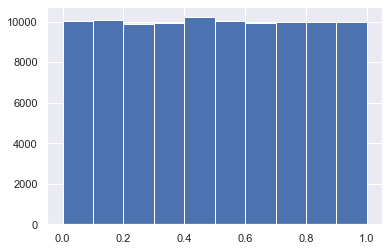

In [25]:
random_numbers = np.random.random(100000)
_ = plt.hist(random_numbers)

A slower method to do the same.

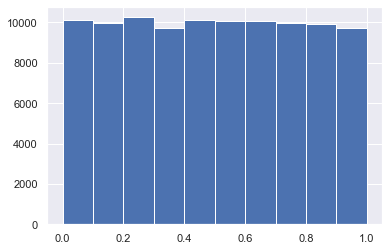

In [26]:
random_numbers = np.empty(100000)

for i in np.arange(100000):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers)

#### Bernoulli trials

In [27]:
def bernoulli_trial(n,p):
    
    n_success = 0
    
    for i in range(n):
        
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1
            
    return n_success
    
    

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05

We will perform this trial 1000 times and then plot the histogram.

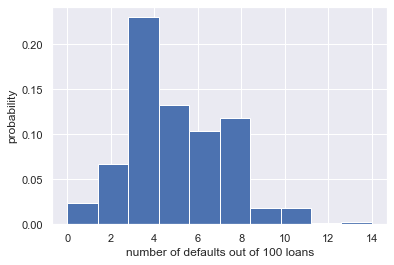

In [28]:
n_defaults = np.empty(1000)

for i in range(len(n_defaults)):
    
    n_defaults[i] = bernoulli_trial(100,0.05)
    

_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

We can plot the ECDF plot for the number to defaults.

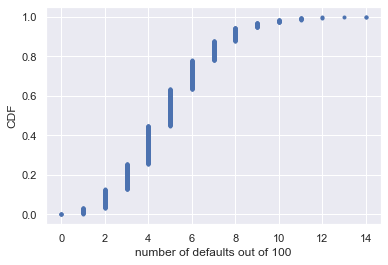

In [29]:
x,y = ecdf(n_defaults)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [30]:
prob_lose_money = sum(n_defaults >= 10) / len(n_defaults)

print(f"The Probability of losing money = {prob_lose_money * 100}%")

The Probability of losing money = 3.0%


#### Sampling out of Binomial Distribution

Instead of Bernoulli distribution, we will use the binomial distribution. Since this is more efficient we will use 10000 samples.

In [31]:
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

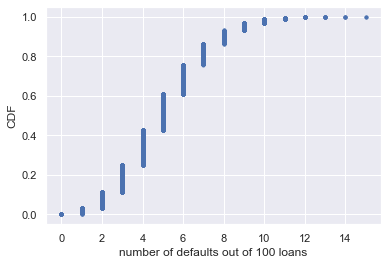

In [32]:
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF');

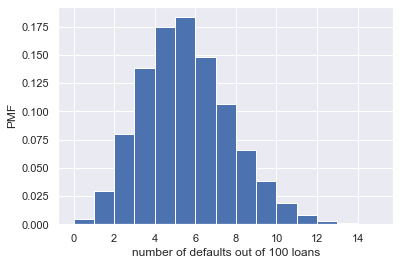

In [33]:
plt.hist(n_defaults, density = True, bins = 15)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF');

#### Relationship between Binomial and Poisson distributions

In [34]:
sample_poisson = np.random.poisson(10,size = 10000)

In [35]:
print(f"Poisson mean: {np.mean(sample_poisson)} and std: {np.std(sample_poisson)}")

Poisson mean: 10.0679 and std: 3.162102084057376


In [36]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

n = 20 Binom: 9.9679 2.2249201311507787
n = 100 Binom: 9.9384 2.947474417191776
n = 1000 Binom: 9.9856 3.105703244033467


### Section 4 - Thinking Probabilistic -- Continuous variables

The Normal PDF

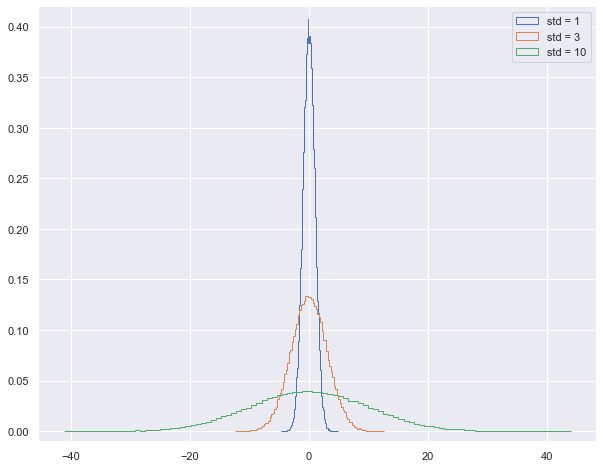

In [37]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(0, 1, size=100000)
samples_std3 = np.random.normal(0, 3, size=100000)
samples_std10 = np.random.normal(0, 10, size=100000)

# Make histograms
plt.figure(figsize=(10,8))
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

#### The Normal CDF

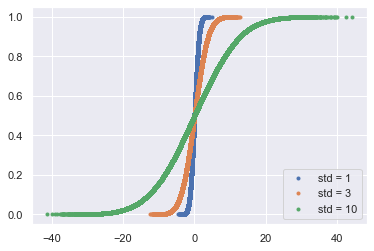

In [38]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

#### Belmonth Stakes

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [39]:
belmont = pd.read_csv('data/belmont.csv')

In [40]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


We will need to convert the time into minutes.

As we can see that the `Time` column has fractions of minutes. So we will first split it and then add the fractions of seconds.

Split the column

In [41]:
belmont[['time', 'seconds']] = belmont['Time'].str.split('.', expand=True)

Convert from `str` to `int`

In [42]:
belmont['seconds'] = [int(i) for i in belmont['seconds'].values]

Convert to `time`

In [43]:
time = pd.DatetimeIndex(belmont['time'])

Add them and append to `time` column

In [44]:
belmont['time'] = time.hour * 60 + time.minute + belmont['seconds']/100

In [45]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time,seconds
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5,148.51,51
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5,146.65,65
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5,148.52,52
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5,150.70,70
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5,150.42,42


In [46]:
mean_time = np.mean(belmont['time'])

In [47]:
sigma = np.std(belmont['time'])

In [48]:
print(f'The mean time is {mean_time} and the standard deviation is {sigma}')

The mean time is 149.21615384615387 and the standard deviation is 1.7643501242516313


Create some samples.

In [49]:
samples = np.random.normal(mean_time, sigma, size = 10000)

In [50]:
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont['time'])

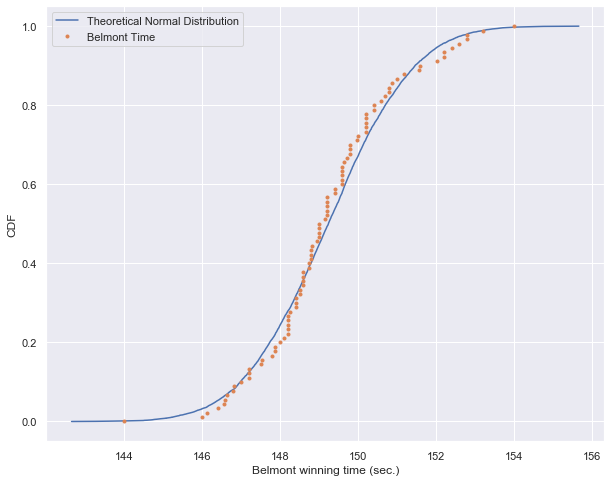

In [51]:
plt.figure(figsize=(10,8))

_ = plt.plot(x_theor, y_theor, label = 'Theoretical Normal Distribution')
_ = plt.plot(x, y, marker='.', linestyle='none', label = 'Belmont Time')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.legend()

The distribution is close to Normal, but the data is not perfectly Normal

What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

Lets look at Secretariat's time. He ran the race in 144 minutes.

In [52]:
belmont[belmont.Winner == 'Secretariat']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time,seconds
43,1973,Secretariat,Ron Turcotte,Lucien Laurin,Meadow Stable,2:24.00,Belmont,1.5,144.0,0


In [53]:
belmont['time'].values

array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 144.  , 148.  , 150.4 , 154.  , 148.8 ,
       147.2 , 148.8 , 149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 ,
       149.2 , 148.4 , 150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 ,
       150.2 , 149.  , 148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 ,
       152.2 , 148.2 , 149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 ,
       150.  , 150.6 , 149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 ,
       153.2 , 152.4 , 152.2 ])

Lets generate a million samples from our mean and sigma.

In [ ]:
samples = np.random.normal(mean_time,sigma,size = 1000000)

The probability of beating 144 minutes is

In [ ]:
prob = np.sum(samples < 144) / len(samples)
print(f"The probability of beating Secretarit's time of 144 minutes is {prob * 100}%")